In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

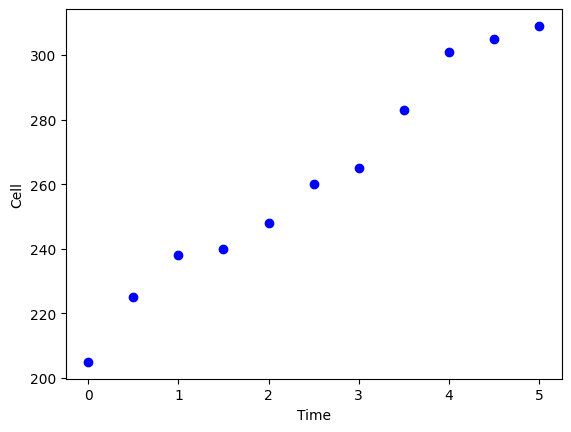

In [2]:
cell_df = pd.read_csv('csv/cells.csv')

plt.xlabel('Time')
plt.ylabel('Cell')
plt.scatter(cell_df['time'], cell_df['cells'], color = 'blue')

In [3]:
cell_df.head()

,time,cells
0,0.0,205
1,0.5,225
2,1.0,238
3,1.5,240
4,2.0,248


Y = the value we want to predict
X = all independent variables upon which Y depends. 
3 steps for linear regression....
Step 1: Create the instance of the model
Step 2: .fit() to train the model or fit a linear model
Step 3: .predict() to predict Y for given X values. 

In [4]:
x_df = cell_df[['time']]
y_df = cell_df[['cells']]

In [5]:
reg = sk.linear_model.LinearRegression()    # Create an instance of the model.
reg.fit(x_df, y_df)							# Train the model or fits a linear model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


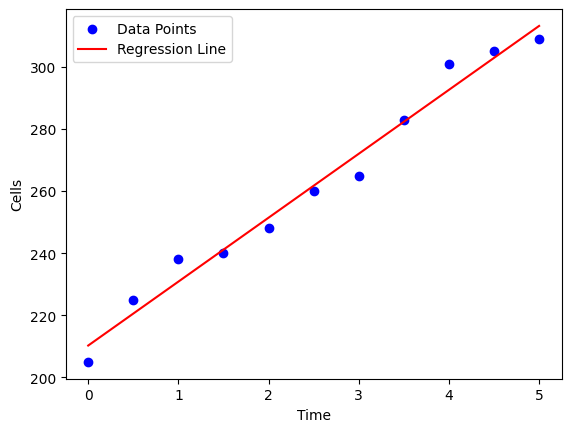

In [6]:
plt.xlabel('Time')
plt.ylabel('Cells')
plt.scatter(x_df, y_df, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_df, reg.predict(x_df), color='red', label='Regression Line')

plt.legend()
plt.show()

In [7]:
#Test the model by Predicting cells for some values reg.predict()
print("Predicted # cells...", reg.predict([[2.3]]))

Predicted # cells... [[257.61090909]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
cell_df['predicted_y'] = reg.predict(x_df)
cell_df.head()

,time,cells,predicted_y
0,0.0,205,210.272727
1,0.5,225,220.563636
2,1.0,238,230.854545
3,1.5,240,241.145455
4,2.0,248,251.436364


In [9]:
cell_df['lose'] = abs(cell_df['cells'] - cell_df['predicted_y'])
cell_df.head()

,time,cells,predicted_y,lose
0,0.0,205,210.272727,5.272727
1,0.5,225,220.563636,4.436364
2,1.0,238,230.854545,7.145455
3,1.5,240,241.145455,1.145455
4,2.0,248,251.436364,3.436364


In [10]:
print(reg.score(x_df, y_df))	 # Prints the R^2 value, a measure of how well observed values are replicated by the model. 

0.9784252641866715


In [11]:
# MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_df, reg.predict(x_df))
print(mse)

mae = mean_absolute_error(y_df, reg.predict(x_df))
print(mae)

# Manually calculate MAE
print(sum(cell_df['lose'])/len(x_df))

23.352066115702517
4.142148760330584
4.142148760330584


In [12]:
# Y = m * X + b (m is coefficient and b is intercept)
#Get the intercept and coefficient values

b = reg.intercept_
m = reg.coef_

#Manually verify the above calculation
print("From maual calculation, cells = ", (m*2.3 + b))


From maual calculation, cells =  [[257.61090909]]


### Now predict cells for a list of times by reading time values from a csv file

In [13]:
cells_predict_df = pd.read_csv('csv/cells_predict.csv')
cells_predict_df = cells_predict_df[['time']]

prediction = reg.predict(cells_predict_df)
cells_predict_df['cells'] = prediction

cells_predict_df.head()

,time,cells
0,0.1,212.330909
1,0.2,214.389091
2,0.3,216.447273
3,0.4,218.505455
4,0.5,220.563636
